### Table of contents
* [Data Loading](#h1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

<a id='h1'></a>
## Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/DPDzero Data analysis assignment/Data_Analyst_Assignment_Dataset (1).csv")

In [ ]:
data

# Calculate the risk labels for all the borrowers.
- Unknown risk :- New customers
- Low risk :- Customers who have not bounced in the last 6 months

- Medium Risk :- These are customers who have bounced at less than twice in the last 6 months - The bounce should not have occurred in the last month.

- High risk :- every other customer

In [ ]:
def risk_label_creator(dataframe) -> None:
  label_list = []
  for i in range(dataframe.shape[0]):
    row  = data.iloc[i]
    Bounce_string = row['Bounce String']
    month_passed = len(Bounce_string)
    if Bounce_string=='FEMI':
      label_list.append('Unknown risk')
      continue
    elif month_passed > 6:
      string_list = list(Bounce_string[-6:])
      S_H_count = 0
      B_L_count = 0
      last_month_bounced = False
      for j in string_list:
        if j in ['S','H']:
          S_H_count+=1
        elif j in ['B','L']:
          B_L_count+=1
      if string_list[-1] in ['B','L']:
        last_month_bounced = True
      if S_H_count==len(string_list):
        label_list.append('Low risk')
      elif (B_L_count<2) and (not last_month_bounced):
        label_list.append('Medium Risk')
      else:
        label_list.append('High Risk')
    else:
      string_list = list(Bounce_string)
      S_H_count = 0
      B_L_count = 0
      last_month_bounced = False
      for j in string_list:
        if j in ['S','H']:
          S_H_count+=1
        elif j in ['B','L']:
          B_L_count+=1
      if string_list[-1] in ['B','L']:
        last_month_bounced = True
      if S_H_count==len(string_list):
        label_list.append('Low risk')
      elif (B_L_count<2) and (not last_month_bounced):
        label_list.append('Medium Risk')
      else:
        label_list.append('High Risk')
  dataframe['Risk Label'] = label_list
  return None
risk_label_creator(data)

In [ ]:
data['Risk Label'].value_counts()

Low risk        13492
High Risk        4913
Unknown risk     3222
Medium Risk      2955
Name: Risk Label, dtype: int64

# Label all customers based on where they are in their tenure
1. Early tenure - Customers who are in the book for 3 months
2. Late tenure - Customers who are 3 months away from closing the loan
3. Mid tenure - Everyone else

In [ ]:
def tenure_label_creator(dataframe) -> None:
  tenure_label = []
  for i in range(dataframe.shape[0]):
    row = dataframe.iloc[i]
    Bounce_string = row['Bounce String']
    if (len(Bounce_string)<=3) or Bounce_string=='FEMI':
      tenure_label.append('Early tenure')
    elif row['Tenure']-len(Bounce_string)<=3:
      tenure_label.append('Late tenure')
    else:
      tenure_label.append('Mid tenure')
  data['Tenure Label'] = tenure_label
  return None
tenure_label_creator(data)

In [ ]:
data['Tenure Label'].value_counts()

Early tenure    15641
Mid tenure       4498
Late tenure      4443
Name: Tenure Label, dtype: int64

# Segment borrowers based on ticket size
Distribute the data into 3 cohorts based on ticket size. This is to be done such that sum of amount pending in each cohort should be approximately equal. Apply the following labels on each borrower based on this logic:
1. Low ticket size
2. Medium ticket size
3. High ticket size

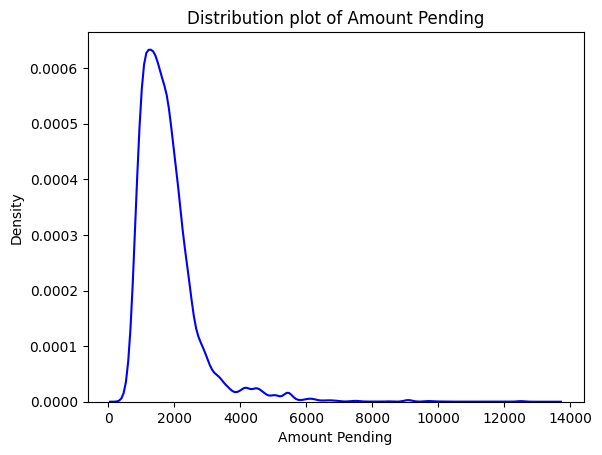

In [ ]:
sns.kdeplot(x=data['Amount Pending'], color='blue')
plt.title("Distribution plot of Amount Pending")
plt.show()

In [ ]:
def ticket_segmenter(dataframe) -> None:
  dataframe.sort_values(by='Amount Pending', ascending=True, inplace=True)
  total_amount_pending = dataframe['Amount Pending'].sum()
  target_amount_pending = total_amount_pending / data.shape[0]
  cohort_labels = []
  for i in range(dataframe.shape[0]):
    row = dataframe.iloc[i]
    amount_pending = row['Amount Pending']
    if amount_pending < 0.9*target_amount_pending:
      cohort_labels.append('Low ticket size')
    elif amount_pending >= 1.28*target_amount_pending:
      cohort_labels.append('High ticket size')
    else:
      cohort_labels.append('Medium ticket size')
  dataframe['Ticket Size'] = cohort_labels
  return None
ticket_segmenter(data)
print(f"The sum of amount in low ticket size : {data[data['Ticket Size']=='Low ticket size']['Amount Pending'].sum()}")
print(f"The sum of amount in Medium ticket size : {data[data['Ticket Size']=='Medium ticket size']['Amount Pending'].sum()}")
print(f"The sum of amount in High ticket size : {data[data['Ticket Size']=='High ticket size']['Amount Pending'].sum()}")

The sum of amount in low ticket size : 15272848
The sum of amount in Medium ticket size : 14211011
The sum of amount in High ticket size : 14546748


In [ ]:
data['Amount Pending'].sum()

44030607

## Summary

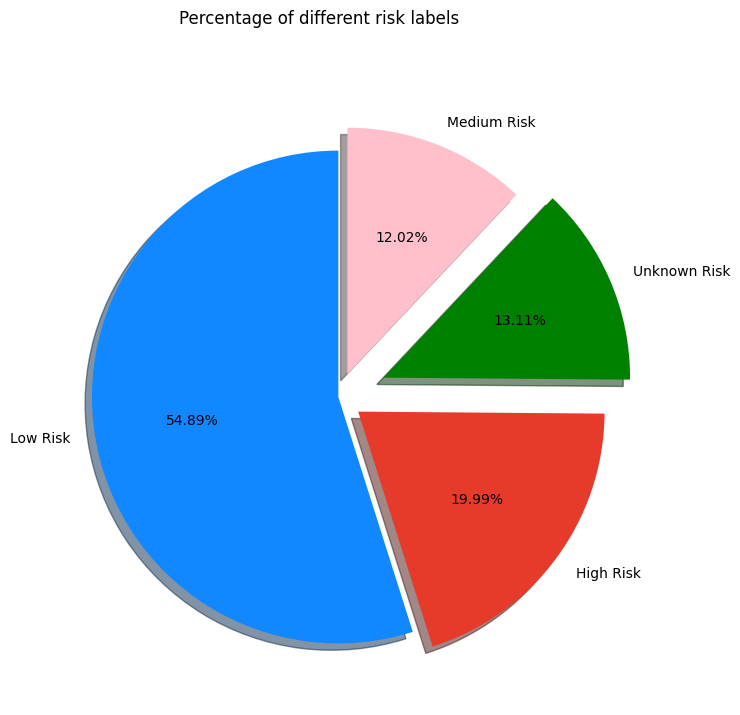

In [ ]:
percentage = data['Risk Label'].value_counts(normalize=True)*100
labels = ['Low Risk', 'High Risk', 'Unknown Risk', 'Medium Risk']
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1,0.2,0.1)
colors = ['#1188ff','#e63a2a','green','pink']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.suptitle("Percentage of different risk labels")
plt.show()

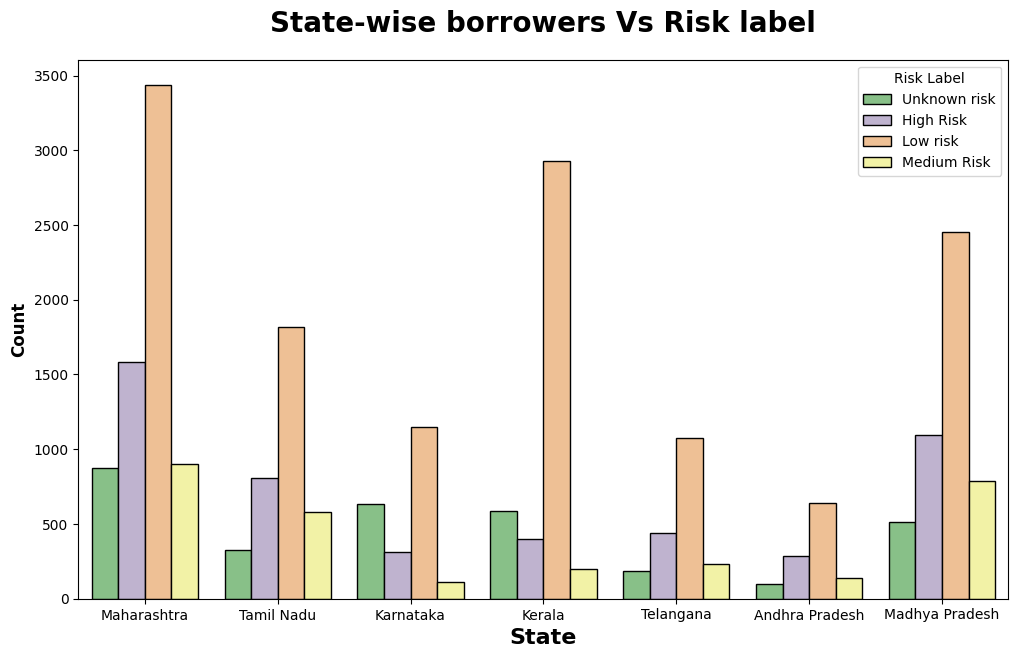

In [ ]:
plt.subplots(figsize=(12,7))
sns.countplot(x="State",hue="Risk Label", data=data, ec = "black",palette="Accent")
plt.title("State-wise borrowers Vs Risk label", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("State", weight="bold", fontsize=16)
plt.legend(title="Risk Label", fancybox=True)
plt.show()

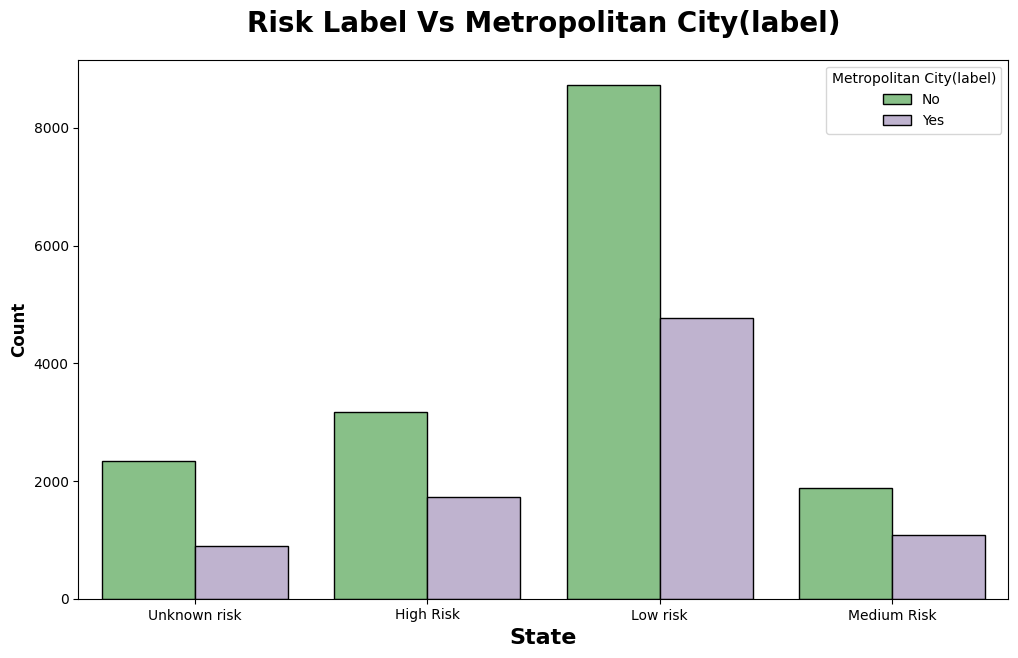

In [ ]:
plt.subplots(figsize=(12,7))
sns.countplot(x="Risk Label",hue="Metropolitan city", data=data, ec = "black",palette="Accent")
plt.title("Risk Label Vs Metropolitan City(label)", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("State", weight="bold", fontsize=16)
plt.legend(title="Metropolitan City(label)", fancybox=True)
plt.show()

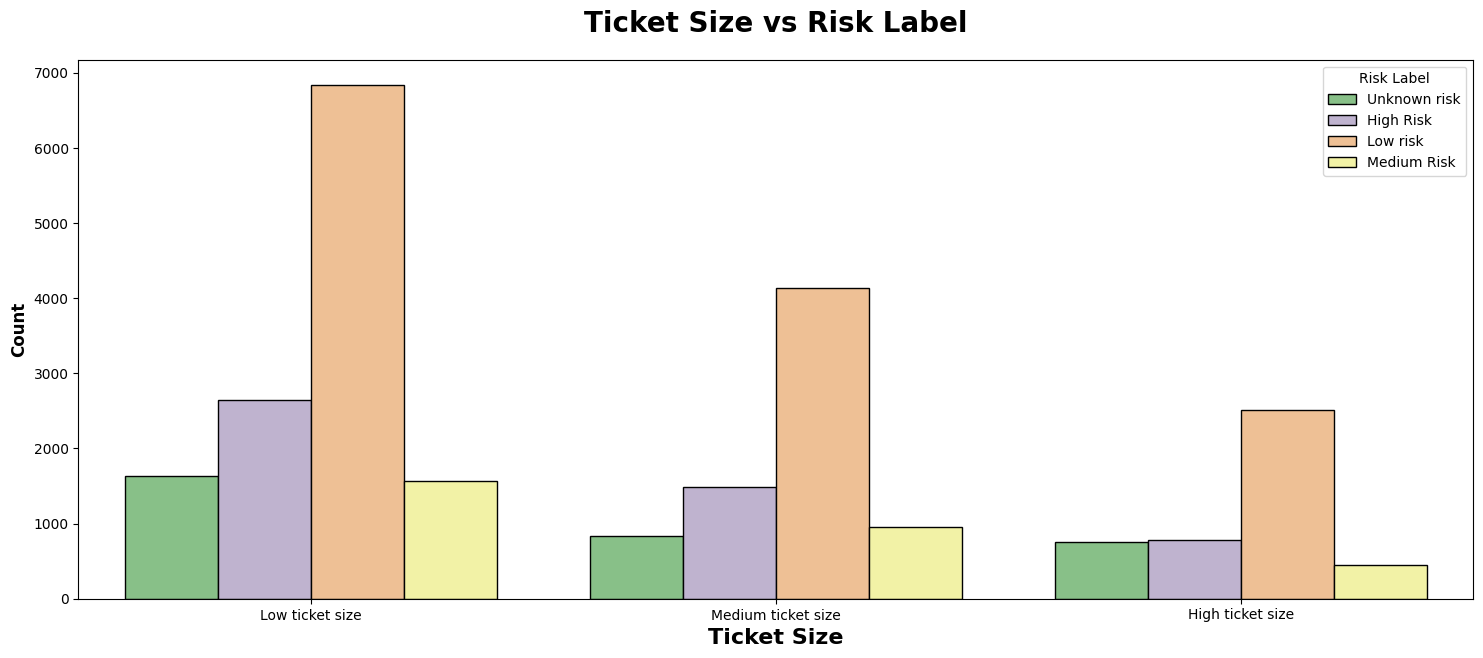

In [ ]:
plt.subplots(figsize=(18,7))
sns.countplot(x="Ticket Size",hue="Risk Label", data=data, ec = "black",palette="Accent")
plt.title("Ticket Size vs Risk Label", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Ticket Size", weight="bold", fontsize=16)
plt.legend(title="Risk Label", fancybox=True)
plt.show()

In [ ]:
data.head(2)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Ticket Size
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown risk,Early tenure,Low ticket size
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown risk,Early tenure,Low ticket size


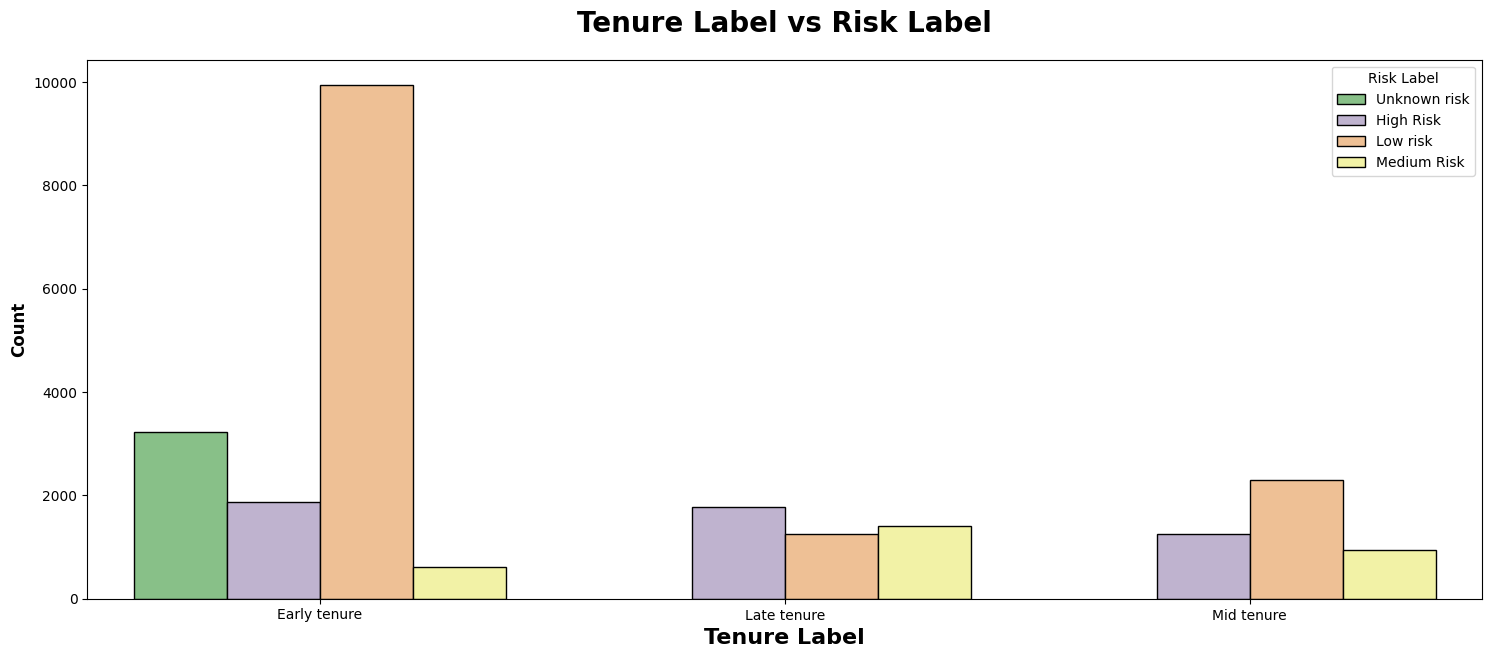

In [ ]:
plt.subplots(figsize=(18,7))
sns.countplot(x="Tenure Label",hue="Risk Label", data=data, ec = "black",palette="Accent")
plt.title("Tenure Label vs Risk Label", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Tenure Label", weight="bold", fontsize=16)
plt.legend(title="Risk Label", fancybox=True)
plt.show()

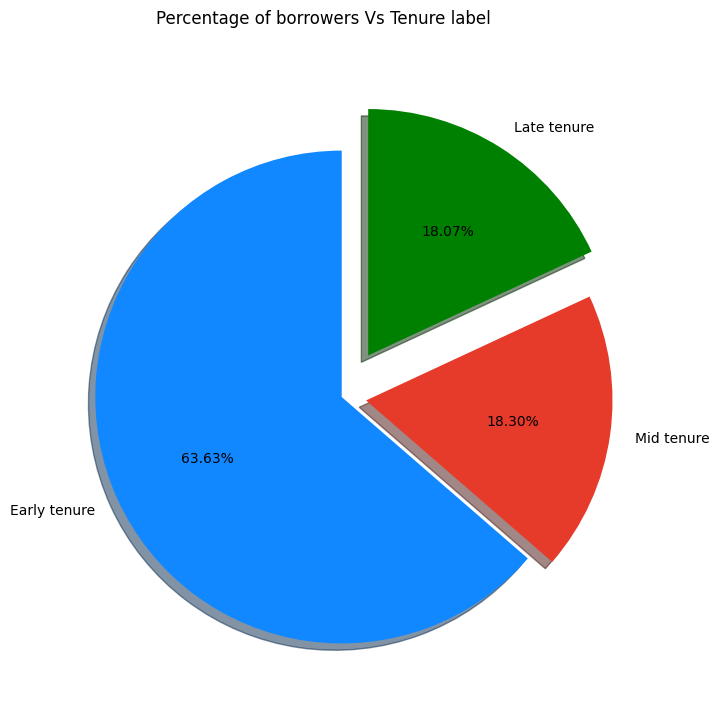

In [ ]:
percentage = data['Tenure Label'].value_counts(normalize=True)*100
labels = ['Early tenure', 'Mid tenure', 'Late tenure']
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1,0.2)
colors = ['#1188ff','#e63a2a','green']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.suptitle("Percentage of borrowers Vs Tenure label")
plt.show()

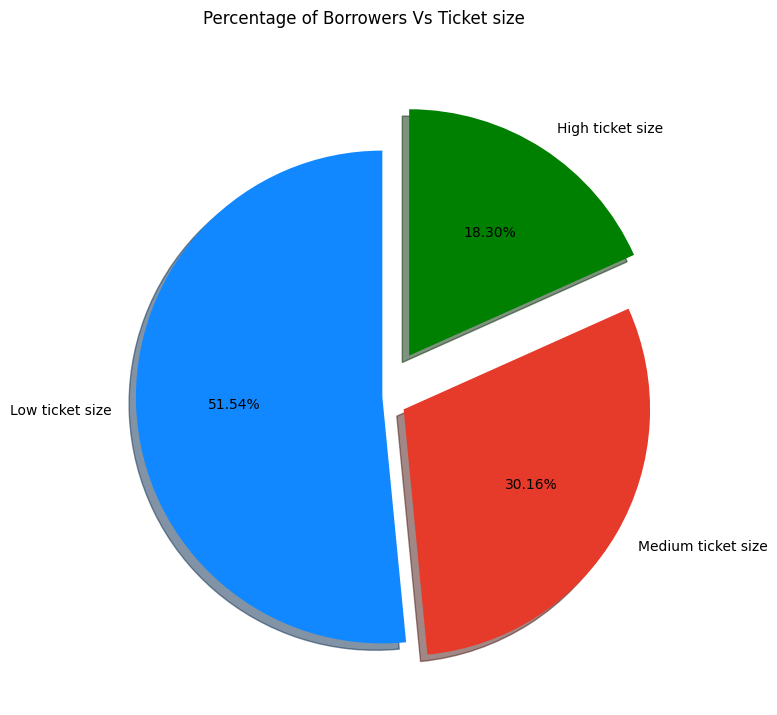

In [ ]:
percentage = data['Ticket Size'].value_counts(normalize=True)*100
labels = ['Low ticket size', 'Medium ticket size', 'High ticket size']
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1,0.2)
colors = ['#1188ff','#e63a2a','green']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.suptitle("Percentage of Borrowers Vs Ticket size")
plt.show()

In [ ]:
metropolitan_cities = ['Greater Mumbai', 'Delhi', 'Kolkata', 'Chennai', 'Bengaluru', 'Hyderabad', 'Ahmadabad', 'Pune', 'Surat', 'Jaipur', 'Kanpur', 'Lucknow', 'Nagpur', 'Ghaziabad', 'Indore', 'Coimbatore', 'Kochi', 'Patna', 'Kozhikode', 'Bhopal', 'Thrissur', 'Vadodara','Agra', 'Malappuram', 'Thiruvananthapuram', 'Kannur',
             'Ludhiana', 'Nashik', 'Vijayawada', 'Madurai', 'Varanasi', 'Meerut', 'Faridabad', 'Rajkot', 'Jamshedpur', 'Srinagar', 'Jabalpur', 'Asansol', 'Vasai Virar City', 'Allahabad', 'Dhanbad', 'Aurangabad',
             'Amritsar', 'Jodhpur', 'Ranchi', 'Raipur', 'Kollam', 'Gwalior', 'Durg-Bhilainagar', 'Chandigarh', 'Tiruchirappalli', 'Kota']
def is_metro_city(dataframe) -> None:
  is_metro = []
  for i in range(dataframe.shape[0]):
    row = dataframe.iloc[i]
    if row['City'] in metropolitan_cities:
      is_metro.append("Yes")
    else:
      is_metro.append("No")
  data['Metropolitan city'] = is_metro
  return None
is_metro_city(data)

- Whatsapp bot - Low risk, FEMI, Low ticket size, early tenure
- Voice bot - medium risk , metropolitan area, low intrest , medium ticket size
- Human Calling - High risk, High ticket size, (mid and late tenure)


In [ ]:
scores = {
    'Low risk' : 1,
    'Unknown risk' : 0,
    'Medium Risk' : 2,
    'High Risk' : 3,
    'Low ticket size' : 1,
    'Medium ticket size' : 2,
    'High ticket size' : 3,
    'Early tenure' : 1,
    'Mid tenure' : 2,
    'Late tenure' : 3
}

data['Score'] = data['Risk Label'].map(scores) + data['Ticket Size'].map(scores) + data['Tenure Label'].map(scores)


**Low Risk, FEMI, Low Ticket Size, Early Tenure:** Whatsapp Bot

**Medium Risk, Metropolitan Area, Low Interest, Medium Ticket Size:** Voice Bot

**High Risk, High Ticket Size, Mid and Late Tenure:** Human Calling

The channel labels were assigned based on the following criteria:

* **Low-risk borrowers with low ticket sizes and early tenure** are considered low-risk and can be effectively handled by a Whatsapp bot.
* **Medium-risk borrowers in metropolitan areas with low interest and medium ticket sizes** can be effectively handled by a voice bot.
* **High-risk borrowers with high ticket sizes and mid or late tenure** require more personalized attention and are best handled by human calling.

The `np.where()` function was used to assign the channel labels based on the specified conditions. The `Score` column was calculated by summing the scores for each risk label, ticket size, and tenure label. The `Metropolitan city` column was created to indicate whether the borrower is located in a metropolitan area.

The resulting `Channel label` column assigns the appropriate channel for each borrower based on their risk profile and other factors. This information can be used to optimize communication strategies and improve collection outcomes.

In [ ]:
data

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Ticket Size,Score,Metropolitan city,Channel label
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown risk,Early tenure,Low ticket size,2,No,Whatsapp bot
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown risk,Early tenure,Low ticket size,2,No,Whatsapp bot
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Late tenure,Low ticket size,7,Yes,Voice bot
265,522,Karnataka,11,12.83,Bagalkot,FEMI,5390,587TX,Unknown risk,Early tenure,Low ticket size,2,No,Whatsapp bot
1486,522,Maharashtra,11,12.83,Pune,S,5390,5QJN0,Low risk,Early tenure,Low ticket size,3,Yes,Whatsapp bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,12500,Maharashtra,8,0.00,Kolhapur,LLSSSSS,100000,8MQRY,Medium Risk,Late tenure,High ticket size,8,No,Human Calling
13946,12500,Maharashtra,8,0.00,Pune,S,100000,1R840,Low risk,Early tenure,High ticket size,5,Yes,Whatsapp bot
23089,12500,Kerala,8,0.00,MALAPPURAM,S,100000,QUV9D,Low risk,Early tenure,High ticket size,5,No,Whatsapp bot
14009,12500,Maharashtra,8,0.00,Sangli,S,100000,66HA4,Low risk,Early tenure,High ticket size,5,No,Whatsapp bot


In [ ]:
data['Channel label'] = np.where(data['Score'] <= 3, 'Whatsapp bot',
                                  np.where((data['Score'] <= 6) | (data['Metropolitan city'] == 'Yes'), 'Voice bot', 'Human Calling'))


In [ ]:
data['Channel label'].value_counts()

Voice bot        14553
Whatsapp bot      7670
Human Calling     2359
Name: Channel label, dtype: int64

In [ ]:
value = data['Channel label'].value_counts()
total_cost = value['Voice bot']*10 + value['Whatsapp bot']*5 + value['Human Calling']*50
print(total_cost)

301830


In [ ]:
print(f"percentage of channel spend over total disbursed amount :  {(total_cost/data['Disbursed Amount'].sum())*100}")

percentage of channel spend over total disbursed amount :  0.06934968034020426


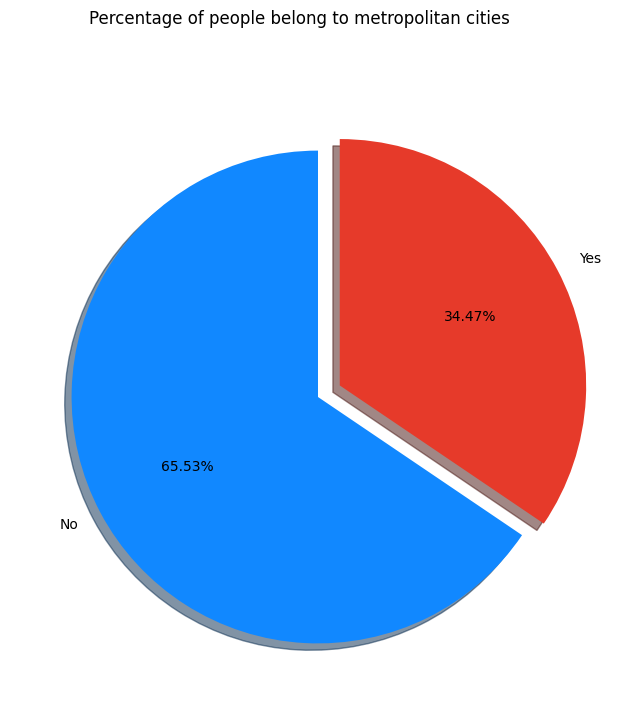

In [ ]:
import matplotlib.pyplot as plt
percentage = data['Metropolitan city'].value_counts(normalize=True)*100
labels = ['No', 'Yes']
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.suptitle("Percentage of people belong to metropolitan cities")
plt.show()


In [ ]:
data['Channel label'].value_counts(normalize=True)*100

Whatsapp bot     50.992596
Human Calling    31.348141
Voice bot        17.659263
Name: Channel label, dtype: float64

In [ ]:
data['Channel label'].value_counts()

Voice bot        14553
Whatsapp bot      7670
Human Calling     2359
Name: Channel label, dtype: int64

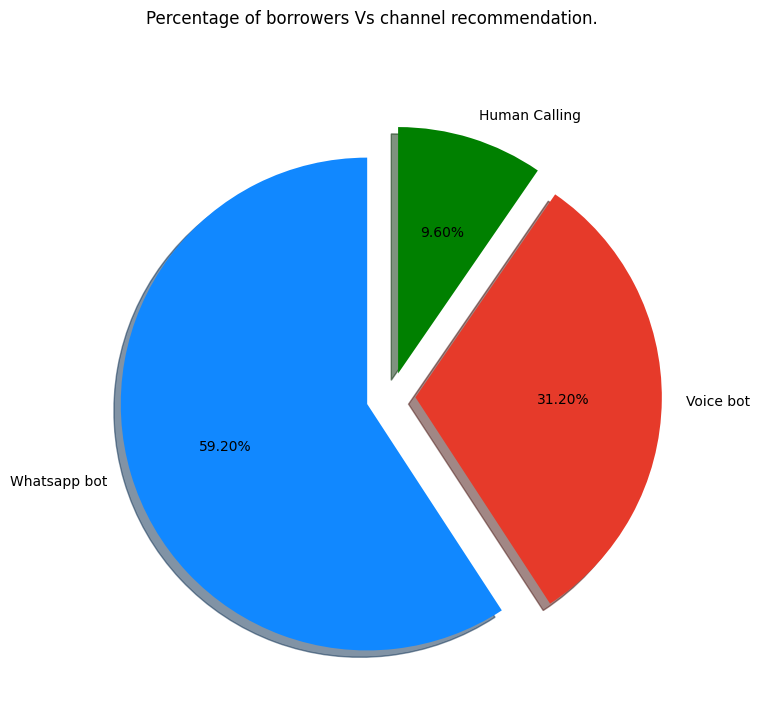

In [ ]:
percentage = data['Channel label'].value_counts(normalize=True)*100
labels = ['Whatsapp bot', 'Voice bot', 'Human Calling']
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0.1, 0.1,0.1)
colors = ['#1188ff','#e63a2a','green']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.suptitle("Percentage of borrowers Vs channel recommendation.")
plt.show()

In [ ]:
data.head(3)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Ticket Size,Metropolitan city,Score,Channel label
1534,423,Maharashtra,11,11.84,Sangli,FEMI,4389,HEMS0,Unknown risk,Early tenure,Low ticket size,No,2,Whatsapp bot
1982,444,Tamil Nadu,11,12.23,VIRUDHUNAGAR,FEMI,4598,1BYJD,Unknown risk,Early tenure,Low ticket size,No,2,Whatsapp bot
889,451,Maharashtra,7,37.92,Pune,LSSSSB,2793,7COLC,High Risk,Late tenure,Low ticket size,Yes,7,Voice bot


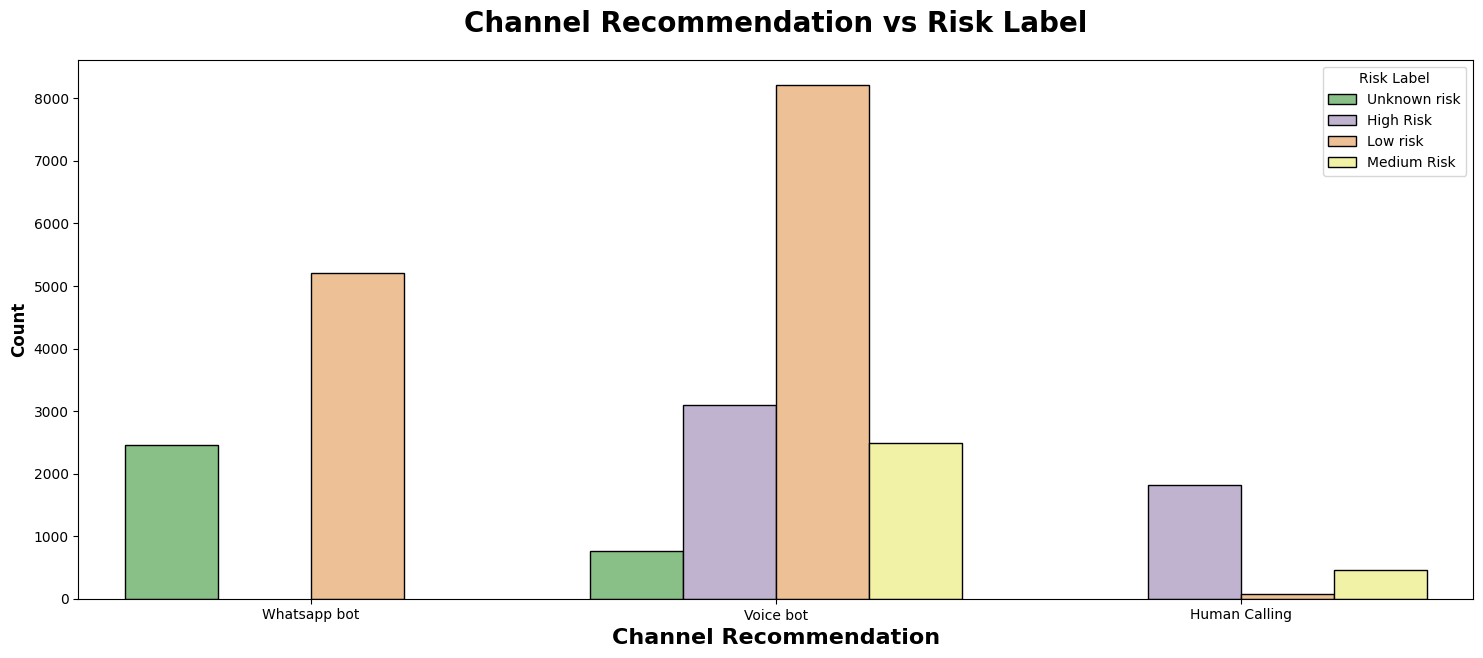

In [ ]:
plt.subplots(figsize=(18,7))
sns.countplot(x="Channel label",hue="Risk Label", data=data, ec = "black",palette="Accent")
plt.title("Channel Recommendation vs Risk Label", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Channel Recommendation", weight="bold", fontsize=16)
plt.legend(title="Risk Label", fancybox=True)
plt.show()